In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
path=r'C:\Users\jphil\OneDrive\Documents\Data Projects\AirBnB'

In [4]:
df=pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'airbnb_cleaned.csv'), index_col=False)

In [5]:
df.head()

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958.0,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,1,128,59,San Francisco
1,5858.0,Creative Sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,1,365,0,San Francisco
2,8142.0,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,13,365,1,San Francisco
3,8339.0,Historic Alamo Square Victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2,365,0,San Francisco
4,8739.0,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2,159,34,San Francisco


# Most expensive and least expensive neighborhoods

In [6]:
# Group by neighborhood and calculate mean price
df_grouped = df.groupby('neighborhood').agg({'price': ['mean', 'median']})

# Flatten the column names
df_grouped.columns = ['mean_price', 'median_price']

# Rank cities by mean price
df_grouped['rank'] = df_grouped['median_price'].rank(ascending=False)

# Sort cities by mean price in descending order
df_grouped_sorted = df_grouped.sort_values(by='median_price', ascending=False)

# Get top 10 neighborhoods
top_10_neighborhoods = df_grouped_sorted.head(10)

# Get bottom 10 neighborhoods
bottom_10_neighborhoods = df_grouped_sorted.tail(10)

# Combine the top and bottom neighborhoods into one DataFrame
top_and_bottom_10_neighborhoods = pd.concat([top_10_neighborhoods, bottom_10_neighborhoods])

# Display the DataFrame with the top and bottom 10 neighborhoods
print(top_and_bottom_10_neighborhoods)

                                        mean_price  median_price    rank
neighborhood                                                            
Bel-Air                                2475.333333        1299.5     1.0
78712                                  1035.000000        1035.0     2.0
Malibu                                 1476.135266         872.0     3.0
Beverly Crest                          1591.354839         869.5     4.0
Fort Wadsworth                          800.000000         800.0     5.0
Hiller Highlands                        560.666667         687.0     6.0
Hollywood Hills West                   1163.907692         629.0     7.0
Lazy Lake                               501.600000         502.0     8.0
Industrial District                     615.000000         495.0     9.0
Unincorporated Santa Monica Mountains  1020.159794         481.0    10.0
Elmhurst Park                            36.000000          36.0  1403.0
New City                                 59.333333 

In [7]:
top_and_bottom_10_neighborhoods.to_clipboard()

In [7]:
import folium
from folium.plugins import HeatMap

# Group by neighborhood and calculate mean price, median price, latitude, and longitude
df_grouped = df.groupby('neighborhood').agg({
    'price': ['mean', 'median'],
    'latitude': 'mean',
    'longitude': 'mean'
})

# Flatten the column names
df_grouped.columns = ['mean_price', 'median_price', 'mean_latitude', 'mean_longitude']

# Sort by median price to find the top 10 and bottom 10 neighborhoods
df_grouped_sorted = df_grouped.sort_values(by='median_price', ascending=False)
top_10_neighborhoods = df_grouped_sorted.head(10)
bottom_10_neighborhoods = df_grouped_sorted.tail(10)

# Normalize the median prices within each group for heatmap intensity
top_10_neighborhoods['price_intensity'] = (top_10_neighborhoods['median_price'] - top_10_neighborhoods['median_price'].min()) / \
                                          (top_10_neighborhoods['median_price'].max() - top_10_neighborhoods['median_price'].min())

bottom_10_neighborhoods['price_intensity'] = (bottom_10_neighborhoods['median_price'] - bottom_10_neighborhoods['median_price'].min()) / \
                                             (bottom_10_neighborhoods['median_price'].max() - bottom_10_neighborhoods['median_price'].min())

# Create a base map for the top neighborhoods
m_top = folium.Map(location=[top_10_neighborhoods['mean_latitude'].mean(), top_10_neighborhoods['mean_longitude'].mean()], zoom_start=11)

# Create a heatmap for the top neighborhoods
heat_data_top = [[row['mean_latitude'], row['mean_longitude'], row['price_intensity']] for index, row in top_10_neighborhoods.iterrows()]
HeatMap(heat_data_top, radius=15).add_to(m_top)

# Save the top neighborhoods heatmap as an HTML file
m_top.save("top_neighborhoods_heatmap.html")

# Create a base map for the bottom neighborhoods
m_bottom = folium.Map(location=[bottom_10_neighborhoods['mean_latitude'].mean(), bottom_10_neighborhoods['mean_longitude'].mean()], zoom_start=11)

# Create a heatmap for the bottom neighborhoods
heat_data_bottom = [[row['mean_latitude'], row['mean_longitude'], row['price_intensity']] for index, row in bottom_10_neighborhoods.iterrows()]
HeatMap(heat_data_bottom, radius=15).add_to(m_bottom)

# Save the bottom neighborhoods heatmap as an HTML file
m_bottom.save("bottom_neighborhoods_heatmap.html")

# If running in a Jupyter notebook, display the maps
m_top  # Display the top neighborhoods heatmap


C:\Users\jphil\AppData\Local\Temp\ipykernel_10504\1976963896.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_neighborhoods['price_intensity'] = (top_10_neighborhoods['median_price'] - top_10_neighborhoods['median_price'].min()) / \
C:\Users\jphil\AppData\Local\Temp\ipykernel_10504\1976963896.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_10_neighborhoods['price_intensity'] = (bottom_10_neighborhoods['median_price'] - bottom_10_neighborhoods['median_price'].min()) / \


In [8]:
m_bottom  # Display the bottom neighborhoods heatmap

# Analysis of activity by host and by customers

In [9]:
# Group by city and host to get the total listings count per host in each city
df_host_city = df.groupby(['city', 'host_id']).agg({
    'calculated_host_listings_count': 'sum'
}).reset_index()

# Now group by city to calculate the number of unique hosts and the average listings per host
df_city_stats = df_host_city.groupby('city').agg({
    'host_id': 'nunique',  # Count of unique hosts per city
    'calculated_host_listings_count': 'mean'  # Average number of listings per host per city
}).reset_index()

# Rename columns for clarity
df_city_stats.columns = ['city', 'number_of_hosts', 'average_listings_per_host']

# Display the resulting DataFrame
print(df_city_stats)


                  city  number_of_hosts  average_listings_per_host
0            Asheville             1988                  13.792254
1               Austin             8623                  20.485910
2               Boston             1268                 191.730284
3       Broward County             6927                  45.422983
4            Cambridge              375                  83.818667
5              Chicago             3590                 137.598607
6         Clark County             5483                  81.787525
7             Columbus              876                  40.353881
8               Denver             3372                  31.432384
9          Jersey City              593                  20.256324
10         Los Angeles            21242                 112.928208
11           Nashville             3702                  60.609941
12         New Orleans             3536                  22.990385
13       New York City            27440                  37.63

In [14]:
df_city_stats.to_clipboard()

In [10]:
# Calculate the ratio of the number of reviews in the last 12 months to the total number of reviews
df['review_activity_ratio'] = df['number_of_reviews_ltm'] / df['number_of_reviews']

# Handle any potential division by zero cases by replacing infinite values with NaN
df['review_activity_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Optionally, you can fill NaN values with 0 if you want to treat listings with no reviews as inactive
df['review_activity_ratio'].fillna(0, inplace=True)

# Display the first few rows to check the new column
print(df[['number_of_reviews_ltm', 'number_of_reviews', 'review_activity_ratio']].head())

   number_of_reviews_ltm  number_of_reviews  review_activity_ratio
0                     59                383               0.154047
1                      0                111               0.000000
2                      1                  9               0.111111
3                      0                 28               0.000000
4                     34                770               0.044156


C:\Users\jphil\AppData\Local\Temp\ipykernel_10504\733022222.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_activity_ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\jphil\AppData\Local\Temp\ipykernel_10504\733022222.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [11]:
# Calculate the average review_activity_ratio per city
city_avg_ratio = df.groupby('city').agg({'review_activity_ratio': 'mean'}).reset_index()

# Sort by average ratio in descending order and get the top 10 cities
top_10_cities = city_avg_ratio.sort_values(by='review_activity_ratio', ascending=False).head(10)

# Display the top 10 cities
print("Top 10 Cities by Review Activity Ratio:")
print(top_10_cities)

Top 10 Cities by Review Activity Ratio:
               city  review_activity_ratio
7          Columbus               0.601660
18            Salem               0.526741
3    Broward County               0.512946
11        Nashville               0.479913
6      Clark County               0.476506
19        San Diego               0.442015
8            Denver               0.437690
25  Twin Cities MSA               0.436506
24          Seattle               0.436454
5           Chicago               0.434006


In [17]:
top_10_cities.to_clipboard()

In [12]:
# Calculate the average review_activity_ratio per neighborhood
neighborhood_avg_ratio = df.groupby('neighborhood').agg({'review_activity_ratio': 'mean'}).reset_index()

# Sort by average ratio in descending order and get the top 10 neighborhoods
top_10_neighborhoods = neighborhood_avg_ratio.sort_values(by='review_activity_ratio', ascending=False).head(10)

# Display the top 10 neighborhoods
print("\nTop 10 Neighborhoods by Review Activity Ratio:")
print(top_10_neighborhoods)


Top 10 Neighborhoods by Review Activity Ratio:
         neighborhood  review_activity_ratio
1312           Ward 6               1.000000
1329          Waverly               1.000000
454     Elmhurst Park               1.000000
1235        Todt Hill               1.000000
1306      Walnut Park               1.000000
496   Foothill Square               1.000000
720      Leona Valley               0.891534
426         East Side               0.891304
761     Lynwood Hills               0.834409
1230  Thomy Locust Pl               0.833333


In [19]:
top_10_neighborhoods.to_clipboard()

# Keyword correlations to price

In [13]:
from collections import Counter
import re

# Lowercase the 'name' column to ensure consistency
df['name'] = df['name'].str.lower()

# Define a simple function to tokenize the text and remove punctuation
def tokenize(text):
    # Use regex to find words and return them as a list
    return re.findall(r'\b\w+\b', text)

# Apply the tokenize function to the 'name' column
df['tokens'] = df['name'].apply(tokenize)

# Flatten the list of tokens to count keyword occurrences
all_tokens = [word for tokens in df['tokens'] for word in tokens]

# Count the occurrences of each keyword
keyword_counts = Counter(all_tokens)

# Create a DataFrame from the keyword counts
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['keyword', 'count'])

# Filter out common stopwords (e.g., 'the', 'and', 'in') - this is a simple example
stopwords = {'and', 'in', 'the', 'a', 'to', 'of', 'is', 'with', 'for', 'on', 'at', 'by'}
keyword_df = keyword_df[~keyword_df['keyword'].isin(stopwords)]

# Set a count threshold (e.g., only include keywords that appear more than 20 times)
count_threshold = 100
keyword_df_filtered = keyword_df[keyword_df['count'] > count_threshold]

# Now calculate the average price for each keyword that exceeds the threshold
def calculate_avg_price_for_keyword(keyword):
    return df[df['tokens'].apply(lambda x: keyword in x)]['price'].mean()

# Apply the function to each keyword in the filtered DataFrame
keyword_df_filtered['avg_price'] = keyword_df_filtered['keyword'].apply(calculate_avg_price_for_keyword)

# Sort the keywords by average price in descending order
keyword_df_sorted = keyword_df_filtered.sort_values(by='avg_price', ascending=False)

# Display the top 10 keywords with the highest average price
print("Top 10 Keywords Associated with Higher Prices (with count threshold):")
print(keyword_df_sorted.head(10))

# Optionally, you can also look at the bottom 10 keywords
print("\nBottom 10 Keywords Associated with Lower Prices (with count threshold):")
print(keyword_df_sorted.tail(10))


Top 10 Keywords Associated with Higher Prices (with count threshold):
         keyword  count    avg_price
2503   suiteness    126  7459.928571
16436        888    287  1737.031359
1076      palace    197  1674.690355
1781       court    155  1610.084416
489         plus    151  1586.105960
514       suites    727  1576.066025
5470    compound    108  1417.064815
1556      estate    541  1346.212963
6592      malibu    465  1138.218143
14094    resorts    126  1132.023810

Bottom 10 Keywords Associated with Lower Prices (with count threshold):
           keyword  count  avg_price
2386         couch    119  86.420168
818           bunk    253  84.348000
743         shared   1921  79.730548
1184        fridge    132  79.545455
2853   unfurnished    133  68.842105
1652        closet    170  68.247059
735         hostel    284  68.007042
1010          dorm    210  65.531401
791         female    243  54.290456
16157         hdtv    174  44.022989


C:\Users\jphil\AppData\Local\Temp\ipykernel_10504\3111227586.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  keyword_df_filtered['avg_price'] = keyword_df_filtered['keyword'].apply(calculate_avg_price_for_keyword)


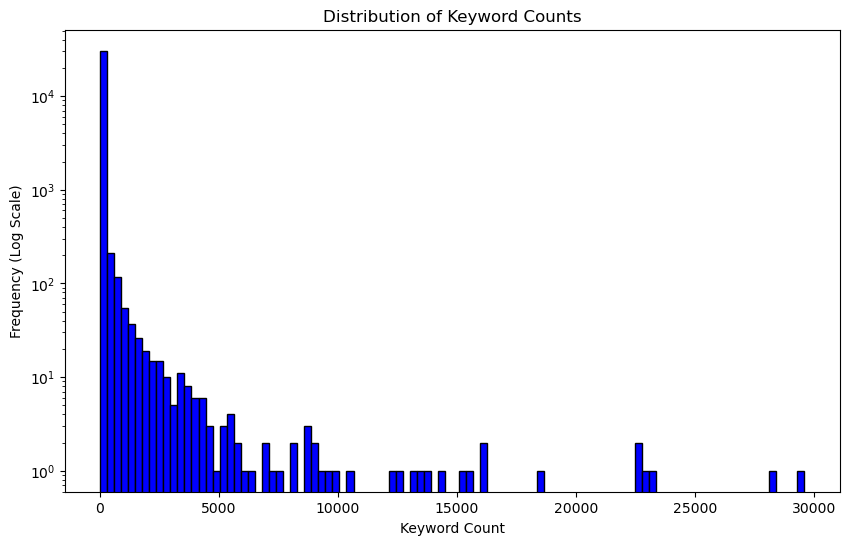

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of keyword counts
plt.figure(figsize=(10, 6))
plt.hist(keyword_df['count'], bins=100, color='blue', edgecolor='black')
plt.yscale('log')  # Log scale to better visualize the distribution
plt.title('Distribution of Keyword Counts')
plt.xlabel('Keyword Count')
plt.ylabel('Frequency (Log Scale)')
plt.show()


# Correlating variables

In [15]:
# Calculate the correlation between 'price' and 'minimum_nights'
correlation = df['price'].corr(df['minimum_nights'])

# Print the correlation coefficient
print(f"The correlation between price and minimum nights is: {correlation}")

The correlation between price and minimum nights is: -0.02279896225178509


In [30]:
sub=df[['price', 'minimum_nights', 'calculated_host_listings_count', 'number_of_reviews', 'availability_365', 'number_of_reviews_ltm', 'review_activity_ratio']]

In [19]:
import seaborn as sns

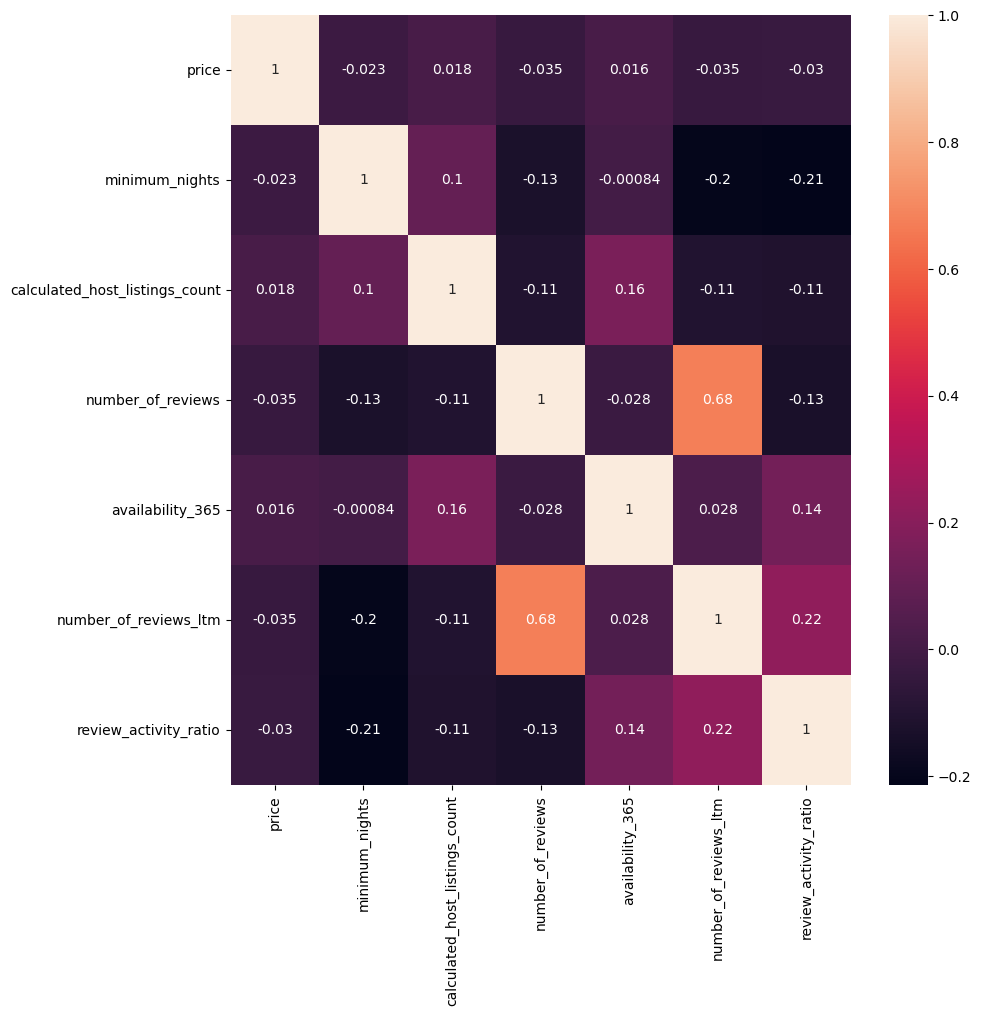

In [31]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [32]:
corr.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'corr_heatmap.png'))

# Price distributions

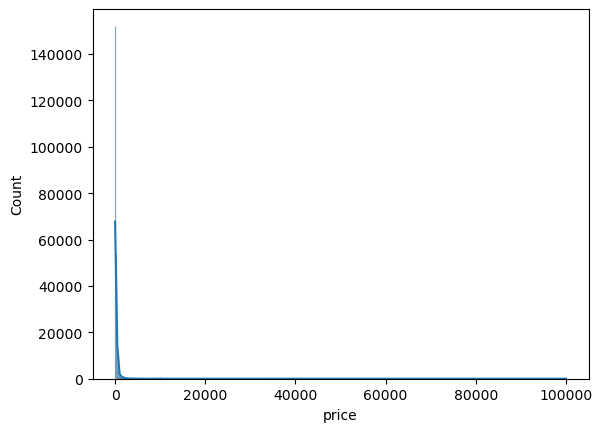

In [24]:
hist=sns.histplot(df['price'], bins = 500, kde = True)

In [ ]:
#this is hard to understand. I'm going to filter out the outlier prices.

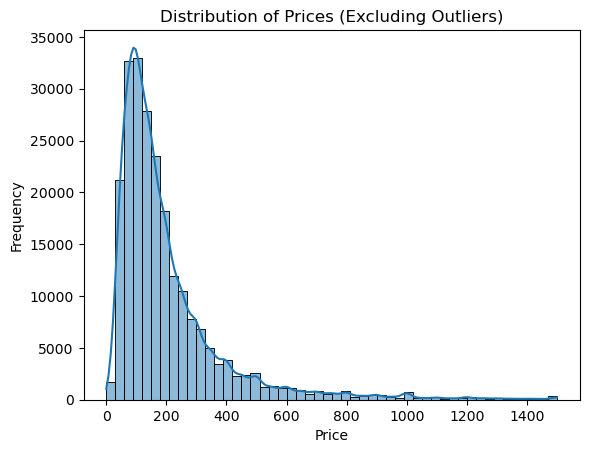

In [25]:
# Define a price threshold (e.g., exclude prices above $1000)
price_threshold = 1500

# Filter the DataFrame to include only prices below the threshold
df_filtered = df[df['price'] <= price_threshold]

# Plot the histogram with the filtered data
hist = sns.histplot(df_filtered['price'], bins=50, kde=True)

# Add a title and labels
plt.title('Distribution of Prices (Excluding Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
#as we can see, the vast majority of prices falls below $200/night, with the biggest bins hovering around $100/night.

In [26]:
hist.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'histo_prices_no_outliers.png'))

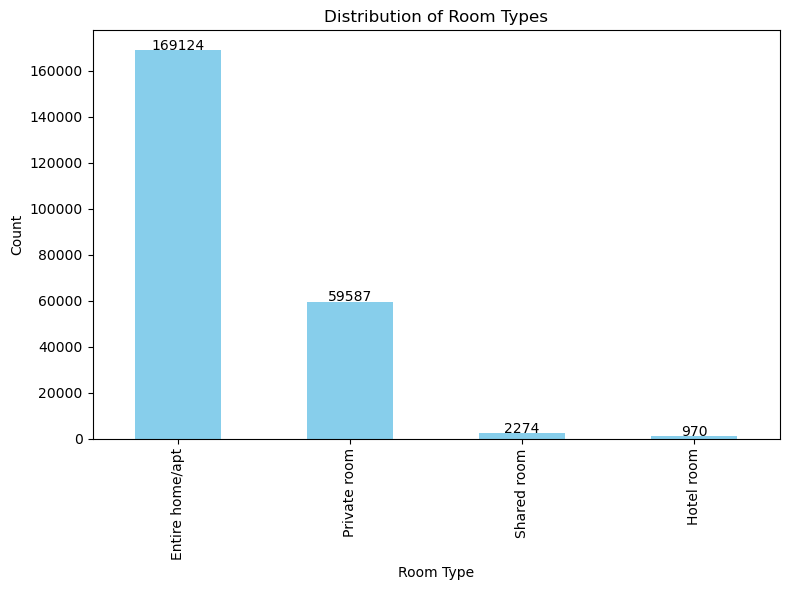

In [28]:
# Group by room type and count the occurrences
room_type_counts = df['room_type'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
room_type_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')

# Adding annotations
for i, count in enumerate(room_type_counts):
    plt.text(i, count + 100, str(count), ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [29]:
df.head()

,id,name,host_id,host_name,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city,review_activity_ratio,tokens
0,958.0,"bright, modern garden unit - 1br/1bth",1169,Holly,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,1,128,59,San Francisco,0.154047,"[bright, modern, garden, unit, 1br, 1bth]"
1,5858.0,creative sanctuary,8904,Philip And Tania,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,1,365,0,San Francisco,0.000000,"[creative, sanctuary]"
2,8142.0,friendly room apt. style -ucsf/usf - san franc...,21994,Aaron,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,13,365,1,San Francisco,0.111111,"[friendly, room, apt, style, ucsf, usf, san, f..."
3,8339.0,historic alamo square victorian,24215,Rosy,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2,365,0,San Francisco,0.000000,"[historic, alamo, square, victorian]"
4,8739.0,"mission sunshine, with private bath",7149,Ivan & Wendy,Mission,37.76030,-122.42197,Private room,110,1,770,2,159,34,San Francisco,0.044156,"[mission, sunshine, with, private, bath]"


In [33]:
df.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'airbnb_derived.csv'))